<a href="https://colab.research.google.com/github/EAakiyama3104/python_lecture/blob/master/%5BPython%E8%AC%9B%E5%BA%A7%5D%E7%AC%AC2%E5%9B%9ECSV%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 今回学ぶこと

* CSV データをPythonプログラムに読み込む方法
* Pandas を用いてデータをを扱う方法
* Seaborn でデータを描画する方法
* spotify APIを使ってプレイリストや曲情報を取得する



## Pandasについて

Pandas とは

* Pythonにおいて、データ解析を支援する機能を提供するライブラリ
* データ操作を行うための DataFrame クラスを持つ。DataFrame内のデータをデータベースのように扱える。
* CSVなど、様々なデータを簡単に読み込める



In [0]:
import pandas as pd

## Python の可視化ライブラリ

matplotlib について

* Python でグラフを描くためのライブラリ


seaborn について

* matplotlib のグラフを簡単にきれいに描画できるライブラリ

例: https://seaborn.pydata.org/examples/index.html

この講座ではseabornを使ってグラフを描画します

In [0]:
import seaborn as sns

# グラフのデザインを指定
sns.set(style="whitegrid")

# ライブラリの中に含まれているサンプルデータセットを読み込み
titanic = sns.load_dataset("titanic")

In [0]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


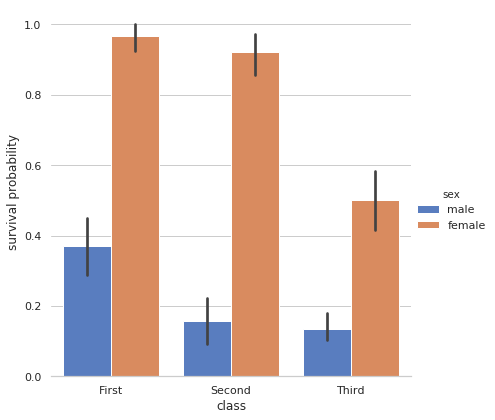

In [0]:
# 棒グラフを描画
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
# 軸を除去
g.despine(left=True)
# y軸のラベルに名前を付ける
g.set_ylabels("survival probability")

In [0]:
# サンプルデータを読み込み
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


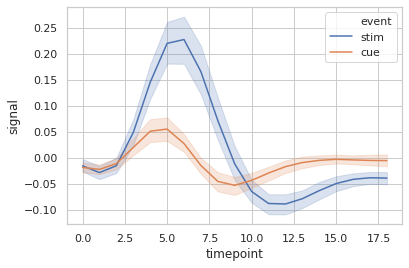

In [0]:
# 折れ線グラフを描画
sns.lineplot(x="timepoint", y="signal", 
             hue="event",# event 毎に折れ線を表示
             data=fmri)

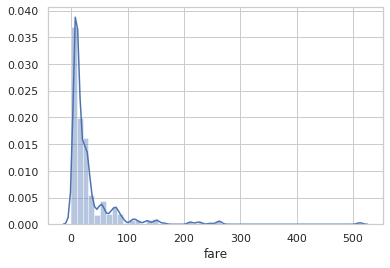

In [0]:
# ヒストグラムを描画
sns.distplot(titanic['fare'])

In [0]:
# サンプルデータを読み込み
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


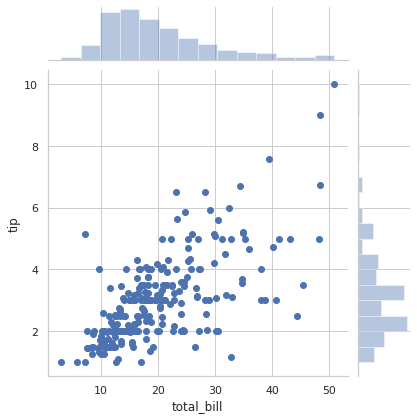

In [0]:
# 散布図を描画
g = sns.jointplot(x="total_bill", y="tip", data=tips)

その他、チャートの種類に関しては、以下を参照されたし
- [よく使うグラフをseabornで可視化する方法を調べてみた](https://qiita.com/ninomiyt/items/cda7ee0b940dd461cd09)
- [公式サイト](https://seaborn.pydata.org/)

## Spotifyデータを可視化する


以下のcsvを利用します（使用の手順）

https://drive.google.com/file/d/1-ZjhK4q3PANqdeutqjqVDTguXe_3Ghxk/view?usp=sharing
- 上のリンクを踏み、マイドライブへ追加する（画像を参照のこと）
![代替テキスト](https://storage.cloud.google.com/akiyama_workspace/images/chart_weekly.csv%20-%20Google%20%E3%83%88%E3%82%99%E3%83%A9%E3%82%A4%E3%83%95%E3%82%99%202020-03-24%2013-18-02.png?hl=ja)
- マイドライブとこのノートブックをマウントする.(以下のセルを実行）
- Go to this URL in a browser:と書かれたリンク先にとび、現在のgoogleアカウントでログイン
- ログイン後、Google Drive File Stream が Google アカウントへのアクセスをリクエストしていますと表示がなされるので、許可ボタンをおす
- secretコード（許可ボタンを押した後に表示される文字列）をコピーして、 下セルの
実行結果にあるEnter your authorization code: のフォームに、先ほどコピーした文字列を入れてenter
- Mounted at /content/drive　と出たら、マウント成功。自分のドライブにあるファイルを読み込むことができる

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns

In [0]:
# spotify の日本の週間チャートデータを読み込む
master_df = pd.read_csv("/content/drive/My Drive/chart_weekly.csv")

In [0]:
# グラフ描画の設定
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("notebook")
# sns.set(font='IPAGothic')

In [0]:
#全部で26600 件、７カラムあることを確認
master_df

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date
0,0,1,Look What You Made Me Do,Taylor Swift,152766,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-08-27
1,1,2,Shape of You,Ed Sheeran,146292,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-08-27
2,2,3,打上花火,DAOKO×米津玄師,144454,https://open.spotify.com/track/7pcTLUekZJQnzDO...,2017-08-27
3,3,4,Friends (with BloodPop®),Justin Bieber,110832,https://open.spotify.com/track/7nZmah2llfvLDiU...,2017-08-27
4,4,5,Despacito - Remix,Luis Fonsi,105296,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-08-27
...,...,...,...,...,...,...,...
26595,195,196,友よ 〜 この先もずっと・・・,Ketsumeishi,108246,https://open.spotify.com/track/3A0VFRUxhqpJeOx...,2020-03-08
26596,196,197,RPG,SEKAI NO OWARI,108089,https://open.spotify.com/track/7facNrW6VRW8s3I...,2020-03-08
26597,197,198,The Other Side (from Trolls World Tour),SZA,107855,https://open.spotify.com/track/463PQggkmk5tTw8...,2020-03-08
26598,198,199,不可幸力,Vaundy,107660,https://open.spotify.com/track/3eWLKn5HOZDrTP7...,2020-03-08


In [0]:
#Unnamed: 0 となっているカラムはいらないので消す（他にも沢山やり方があるが、ここでは、列を指定して、再代入するやり方をとる)
master_df = master_df.iloc[:,1:] # ilocのブラケット内の引数は、 1番目の引数で行番号を指定できて、二番目の引数で列番号を指定できる
print(f"master_df columns : {master_df.columns}") # .columns でカラムが表示される
master_df

In [0]:
# 最初の行のみを表示
master_df.head(3) #引数に指定しない場合は、五行分が表示される

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date
0,0,1,Look What You Made Me Do,Taylor Swift,152766,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-08-27
1,1,2,Shape of You,Ed Sheeran,146292,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-08-27
2,2,3,打上花火,DAOKO×米津玄師,144454,https://open.spotify.com/track/7pcTLUekZJQnzDO...,2017-08-27


In [0]:
# 特定の列のみ抽出
master_df[['Track Name', 'Artist']].head()

,Track Name,Artist
0,Look What You Made Me Do,Taylor Swift
1,Shape of You,Ed Sheeran
2,打上花火,DAOKO×米津玄師
3,Friends (with BloodPop®),Justin Bieber
4,Despacito - Remix,Luis Fonsi


アーティスト名の長さをカラムに追加

In [0]:
# artist_name カラムを明示的にstrに型変換
master_df["Artist"] = master_df["Artist"].astype(str)

In [0]:
# artist_name カラムの要素に1つずつ、len() メソッドを適用し、アーティスト名の長さを取得
master_df["name_length"] = master_df["Artist"].map(len) # map関数で各行の値を長さにマッピング（変換）している

In [0]:
master_df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date,name_length
0,0,1,Look What You Made Me Do,Taylor Swift,152766,https://open.spotify.com/track/6uFsE1JgZ20EXyU...,2017-08-27,12
1,1,2,Shape of You,Ed Sheeran,146292,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-08-27,10
2,2,3,打上花火,DAOKO×米津玄師,144454,https://open.spotify.com/track/7pcTLUekZJQnzDO...,2017-08-27,10
3,3,4,Friends (with BloodPop®),Justin Bieber,110832,https://open.spotify.com/track/7nZmah2llfvLDiU...,2017-08-27,13
4,4,5,Despacito - Remix,Luis Fonsi,105296,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-08-27,10


In [0]:
# 長さが30以上のアーティストのみ抽出
master_df[master_df['name_length'] >= 30]

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date,name_length
1363,163,164,HAPPY,J Soul Brothers III from EXILE TRIBE,19867,https://open.spotify.com/track/6U1HaCuOL1ZouGk...,2017-10-08,36
1575,175,176,R.Y.U.S.E.I.,J Soul Brothers III from EXILE TRIBE,20145,https://open.spotify.com/track/0eio2xxlLcgMCSM...,2017-10-15,36
1785,185,186,R.Y.U.S.E.I.,J Soul Brothers III from EXILE TRIBE,20633,https://open.spotify.com/track/0eio2xxlLcgMCSM...,2017-10-22,36
1789,189,190,HAPPY,J Soul Brothers III from EXILE TRIBE,20379,https://open.spotify.com/track/6U1HaCuOL1ZouGk...,2017-10-22,36
1990,190,191,R.Y.U.S.E.I.,J Soul Brothers III from EXILE TRIBE,20723,https://open.spotify.com/track/0eio2xxlLcgMCSM...,2017-10-29,36
...,...,...,...,...,...,...,...,...
25347,147,148,Rat-tat-tat,J Soul Brothers III from EXILE TRIBE,117200,https://open.spotify.com/track/1vtxgfTp6CDMobV...,2020-01-26,36
25526,126,127,Rat-tat-tat,J Soul Brothers III from EXILE TRIBE,126742,https://open.spotify.com/track/1vtxgfTp6CDMobV...,2020-02-02,36
25754,154,155,Rat-tat-tat,J Soul Brothers III from EXILE TRIBE,117764,https://open.spotify.com/track/1vtxgfTp6CDMobV...,2020-02-09,36
25970,170,171,Rat-tat-tat,J Soul Brothers III from EXILE TRIBE,113767,https://open.spotify.com/track/68sE2eOcyJdy8c9...,2020-02-16,36


In [0]:
# ブラケット内ではこのようになっている、
master_df['name_length'] >= 30

0        False
1        False
2        False
3        False
4        False
         ...  
26595    False
26596    False
26597    False
26598    False
26599    False
Name: name_length, Length: 26600, dtype: bool

上では、行ごとにTrue、Falseといった判定結果が記載されたpandas.Series（pandasの1カラムバージョン）が生成され、それをpandasのブラケットに入れることにより、Trueになっている行のみが抽出される



In [0]:
# 長い順にソート
master_df.sort_values(by='name_length', ascending=False).head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date,name_length
21294,94,95,ヒプノシスマイク -Alternative Rap Battle-,ヒプノシスマイク -A.R.B- (Division All Stars),109826,https://open.spotify.com/track/4OYV0zmjX6jYVgn...,2019-09-08,37
4671,71,72,R.Y.U.S.E.I.,J Soul Brothers III from EXILE TRIBE,49044,https://open.spotify.com/track/0eio2xxlLcgMCSM...,2018-02-04,36
13959,159,160,R.Y.U.S.E.I.,J Soul Brothers III from EXILE TRIBE,54563,https://open.spotify.com/track/0eio2xxlLcgMCSM...,2018-12-23,36
9872,72,73,RAINBOW (feat. Yellow Claw),J Soul Brothers III from EXILE TRIBE,57928,https://open.spotify.com/track/66PEbvbSd3ntcfK...,2018-08-05,36
3658,58,59,R.Y.U.S.E.I.,J Soul Brothers III from EXILE TRIBE,48633,https://open.spotify.com/track/0eio2xxlLcgMCSM...,2017-12-31,36


In [0]:
#短い順にソート
master_df.sort_values(by='name_length', ascending=True).head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date,name_length
14462,62,63,AM11:00,HY,80787,https://open.spotify.com/track/6YcvfXy4wTvjaIn...,2019-01-13,2
12146,146,147,三月の陽炎,HY,44656,https://open.spotify.com/track/7fYJOWWC3POzPz6...,2018-10-21,2
11664,64,65,AM11:00,HY,66171,https://open.spotify.com/track/6YcvfXy4wTvjaIn...,2018-10-07,2
18527,127,128,NAO,HY,69886,https://open.spotify.com/track/2PeCrMLUayMPZnL...,2019-06-02,2
23144,144,145,AM11:00,HY,106460,https://open.spotify.com/track/6YcvfXy4wTvjaIn...,2019-11-10,2


In [0]:
# 欠損値を確認
master_df.isnull()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,date,name_length
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
26595,False,False,False,False,False,False,False,False
26596,False,False,False,False,False,False,False,False
26597,False,False,False,False,False,False,False,False
26598,False,False,False,False,False,False,False,False


In [0]:
master_df.isnull().sum()

Unnamed: 0     0
Position       0
Track Name     3
Artist         0
Streams        0
URL            0
date           0
name_length    0
dtype: int64

In [0]:
# 欠損値(null)を置換
master_df.fillna(value={'Track Name': ''}, inplace=True)
master_df.isnull().sum()

Unnamed: 0     0
Position       0
Track Name     0
Artist         0
Streams        0
URL            0
date           0
name_length    0
dtype: int64

In [0]:
# 欠損値がある行を削除
master_df.dropna(inplace=True)
master_df.isnull().sum()

Unnamed: 0     0
Position       0
Track Name     0
Artist         0
Streams        0
URL            0
date           0
name_length    0
dtype: int64

2019年以降で、トップ10０以上 のみを抽出

In [0]:
# 複数条件がある場合は、 各条件をブレースでまとめて、 &( or　検索の場合は |)といった演算子をつける
top100_2019 = master_df[(master_df.date >= "2019-01-01") & (master_df.Position <= 100 )].sort_values(by=["date", "Position"], ascending=True)

In [81]:
top100_2019

,Position,Track Name,Artist,Streams,URL,date,name_length
14200,1,今夜このまま,Aimyon,351166,https://open.spotify.com/track/0sSG83UxY15ft1E...,2019-01-06,6
14201,2,マリーゴールド,Aimyon,332005,https://open.spotify.com/track/0jWVUKsIoyo3zw6...,2019-01-06,6
14202,3,君はロックを聴かない,Aimyon,274619,https://open.spotify.com/track/59eluCMn0XbOWqe...,2019-01-06,6
14203,4,愛を伝えたいだとか,Aimyon,221550,https://open.spotify.com/track/0N8Xztr4pBHJ7V0...,2019-01-06,6
14204,5,打上花火,DAOKO×米津玄師,217624,https://open.spotify.com/track/4IouQaO9GkaHC7A...,2019-01-06,10
...,...,...,...,...,...,...,...
26495,96,Señorita,Shawn Mendes,164345,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,2020-03-08,12
26496,97,青空,aiko,163059,https://open.spotify.com/track/10oI3g6tvqOu73Z...,2020-03-08,4
26497,98,チェリー,SPITZ,162975,https://open.spotify.com/track/1ihCiJaXRl4f6Sy...,2020-03-08,5
26498,99,アイデア,Gen Hoshino,162343,https://open.spotify.com/track/7jgqNMnqAT9FghC...,2020-03-08,11


アーティスト名の長さごとに平均順位を求める手順

1. DataFrameの全データをアーティスト名の長さ毎に分割して、グループを作成 (Splitting)
2. グループ毎に平均値を求める (Applying)
3. それぞれのグループを合わせた新しいDataFrameを作成 (Combining)



![年毎の平均値を求める](http://drive.google.com/uc?export=view&id=1jWuNslF69Rd2dYjJfN1LkzELnOJ0k8js)


公式ドキュメント

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [0]:
# 名前の長さごとにデータを分割
top100_groupby_name_length = top100_2019.groupby('name_length')

In [84]:
# 名前の長さごとの平均値を算出、データを合成
top100_groupby_name_length.mean()

,Position,Streams
name_length,,
2,47.525140,168542.229050
3,54.538043,171687.570652
4,63.307377,176420.504098
5,62.245487,140012.723827
6,42.220118,226607.817751
7,47.245614,161499.883041
8,52.138103,250488.748752
9,53.281938,162531.422907
10,51.598985,167060.035533


上の例では、21文字の平均順位が9位ととても高いが、２１文字のアーティストの数自体が少なく、データもばらついていないためなのかもしれない。

以下に、アーティストの数を考察してみる

In [101]:
# 各カラムのユニークの個数を表示する
top100_groupby_name_length.nunique()

,Position,Track Name,Artist,Streams,URL,date,name_length
name_length,,,,,,,
2,75,4,2,179,4,62,1
3,83,28,5,184,29,62,1
4,80,23,13,243,24,62,1
5,94,36,13,554,45,62,1
6,100,60,10,843,70,62,1
7,76,6,4,171,6,62,1
8,95,39,12,601,45,62,1
9,87,20,12,227,21,62,1
10,97,28,15,393,33,62,1


Artistカラムをみてみると、21文字のアーティストは１組しかいなかった。（ちなみに、official hige dandism でした）

これを踏まえてもう一度集計してみると....

In [89]:
# 名前の長さ、アーティスト毎に集約した後、それぞれの統計値を出し（describe()関数）、それをさらに名前の長さにまとめる。
# こうすることで、各アーティストの代表値（平均の値とする）を集計した後、名前の長さで集約することが言える。
 top100_2019.groupby(["name_length","Artist"]).describe().groupby("name_length").describe().Position

count                                 ...     max                      
            count        mean         std    min  ...     25%    50%     75%    max
name_length                                       ...                              
2             2.0   89.500000   44.547727   58.0  ...   95.50   97.0   98.50  100.0
3             5.0   36.800000   48.653880    1.0  ...   94.00   97.0   99.00  100.0
4            13.0   18.769231   20.656532    1.0  ...   95.00   98.0  100.00  100.0
5            13.0   42.615385   45.558641    1.0  ...   92.00   97.0  100.00  100.0
6            10.0   84.500000  176.175575    2.0  ...   97.25   99.5  100.00  100.0
7             4.0   42.750000   55.343624    5.0  ...   76.25   86.5   94.50   99.0
8            12.0   50.083333   86.769767    2.0  ...   94.25   98.5  100.00  100.0
9            12.0   18.916667   21.719109    1.0  ...   88.25   95.5   98.25  100.0
10           15.0   26.266667   39.566340    1.0  ...   87.00   95.0   99.00  100.0
11           17.0   57.411765   84.972097    1.0  ...   81.00   96.0   98.00  100.0
12           17.0   19.882353   24.522649    1.0  ...   91.00   96.0   97.00  100.0
13            8.0   56.000000   42.091737    1.0  ...   92.50   98.0   99.25  100.0
14           10.0    8.700000    8.327331    1.0  ...   95.25   97.5   99.00  100.0
15            4.0    9.000000   14.696938    1.0  ...   75.25   83.5   88.75  100.0
16            4.0  109.000000  148.366663    1.0  ...   95.25   99.0  100.00  100.0
17            3.0    6.333333    7.571878    1.0  ...   80.00   92.0   95.50   99.0
18            2.0    7.500000    9.192388    1.0  ...   91.75   92.5   93.25   94.0
19            5.0    5.200000    4.604346    1.0  ...   92.00   96.0   97.00  100.0
21            1.0  407.000000         NaN  407.0  ...  100.00  100.0  100.00  100.0
26            1.0    2.000000         NaN    2.0  ...   94.00   94.0   94.00   94.0
28            1.0    4.000000         NaN    4.0  ...   99.00   99.0   99.00   99.0
33            1.0    1.000000         NaN    1.0  ...   58.00   58.0   58.00   58.0
36            1.0    5.000000         NaN    5.0  ...   97.00   97.0   97.00   97.0
37            1.0    1.000000         NaN    1.0  ...   95.00   95.0   95.00   95.0

[24 rows x 64 columns]

In [0]:
 # 最終的に集約した結果を代入
 mean_by_name_length= top100_2019.groupby(["name_length","Artist"]).describe().groupby("name_length").describe()["Position"]["mean"]

平均値を棒グラフで表示する際は、barplot を使用


https://seaborn.pydata.org/generated/seaborn.barplot.html

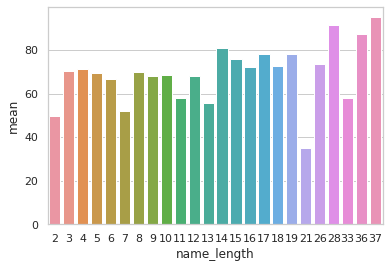

In [114]:
# プロット
chart = sns.barplot(x=mean_by_name_length.index, y="mean" ,data=mean_by_name_length)

## 考察ポイント
- 以上の図をみると、名前が長いほど、チャート順位も下落していないか（２１文字以上のアーティストは全て１組なので、考慮外においた方が良いのかもしれないが）
- また、年ごとに、人気となってくるアーティストの名前の長さも変化していくのではないか
- 他にも、アーティストの名前を考察し、人気となるアーティストの名前の共通の特徴を抽出してみるのもいいのかもしれない

# Spotify APIを使用する

Spotify API の特徴

![代替テキスト](https://cdn-ssl-devio-img.classmethod.jp/wp-content/uploads/2017/12/spotify-api-overview.png)

* Spotify URIやSpotify IDなど、Spotify特有のパラメータ情報をリクエスト、レスポンス時に扱うことがあります。
* レート制限に引っかかるとステータスコード429が返却される。これが返ってきた場合は、Retry-Afterヘッダーの値を確認し、そこに記載されている秒の間はAPIをコールすることができない。

* レスポンスデータは、JSON Object形式で取得します。

* タイムスタンプはUTC zero offset形式（YYYY-MM-DDTHH:MM:SSZ）

* 一部のAPIではページネーションをサポート（offset、limitパラメータで指定）

* 多くのAPIでは、クライアント側でレスポンスデータのキャッシュを行うためのヘッダー情報が付与される。

* レスポンスステータスコードは、RFC 2616 と RFC 6585に則って2xx、3xx、4xx、5xxを返す。

* レスポンスデータのエラー表現には、下記2種類のフォーマットを使用する。

  * Authentication Error Object
  * Regular Error Object
*APIをコールするにはOAuthアクセストークンが必要。

認証方法の種類

![代替テキスト](https://cdn-ssl-devio-img.classmethod.jp/wp-content/uploads/2017/12/Obtaining-Authorization.png)

* App Authorization
  * システム（Spotify）が、クライアントアプリケーションに、Spotify Platform (APIs, SDKs and Widgets)へアクセスすることを許可します。
* User Authorization
  * エンドユーザー（Spotifyのエンドユーザー）が、クライアントアプリケーションに、エンドユーザーが所有するデータへアクセスすることを許可します。

アプリが認証の許可を得るための3つの方法


* Refreshable user authorization: Authorization Code
  * このフローでは、エンドユーザーはクライアントアプリケーションがリソースへアクセスすることを1度だけ許可します。そのため長期間稼働させるアプリケーションに適しています。 アプリケーションにはリフレッシュ可能なアクセストークンを提供されます。ちなみにトークン交換には秘密鍵の送信が含まれるため、ブラウザやモバイルアプリなどのクライアントからではなく、バックエンドサービスなどの安全な場所でこれを実行します。
* Temporary user authorization: Implicit Grant
  * このフローは、JavaScriptを使用するため、リソース所有者のブラウザで実行されるクライアントアプリケーション向けです。サーバー側のコードを使用する必要はありません。リクエストのレート制限は改善されていますが、リフレッシュトークンは提供されていません。このフローはRFC-6749で定義されています。
* **Refreshable app authorization: Client Credentials Flow**
  * このフローは、サーバー間認証で使用されます。エンドユーザー情報にアクセスしないエンドポイントのみにアクセスが可能です。
  * **このセミナーではこの認証方法を使用**

## アカウントを作る

1. https://www.spotify.com/ にアクセスしてアカウントを作る。
2. https://developer.spotify.com/my-applications に行ってログイン
3. Create an Application に Application Name と Description を入れる
4. Are you developing a commercial integration? と聞かれたら、この講座では NO を選択
5. チェックボックスをオンにして Submit
6. Client ID と Client Secret メモしておく。APIを呼ぶ際に使います。

## Spotipyのインストール

Spotipy とは、Spotify APIを呼ぶためのPythonライブラリ

* HTTPリクエストを送る操作をライブラリ内で行っているため、リクエストを意識せずに使うことができる
* pip install spotipy でインストール

In [0]:
!pip install spotipy

spotipy.Spotify クラスがAPIへ様々なリクエストを送る

https://spotipy.readthedocs.io/en/latest/#module-spotipy.client

In [0]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

CLIENT_ID = "ここに ClientIDを登録"
CLIENT_SECRET = "ここに ClientSeacret を登録"

# 認証情報をセット
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
# 認証情報を元に、APIクライアントを作成
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

プレイリストを取得

公式リファレンス: https://developer.spotify.com/documentation/web-api/reference/playlists/get-list-users-playlists/

Spotipyリファレンス: https://spotipy.readthedocs.io/en/latest/#spotipy.client.Spotify.user_playlist

In [0]:
# Spotify 公式のプレイリストから2つ取得
playlists = sp.user_playlists('spotify',limit=2)
# 辞書形式で返却される
type(playlists)

pprint を用いるとよりきれいにデータを表示できる

https://docs.python.org/ja/3/library/pprint.html

In [0]:
from pprint import pprint
pprint(playlists)

{'href': 'https://api.spotify.com/v1/users/spotify/playlists?offset=0&limit=2',
 'items': [{'collaborative': False,
            'description': 'Justin Bieber is on top of the Hottest 50!',
            'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
            'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M',
            'id': '37i9dQZF1DXcBWIGoYBM5M',
            'images': [{'height': None,
                        'url': 'https://i.scdn.co/image/ab67706f00000002d64a11668f38098bed858dcd',
                        'width': None}],
            'name': "Today's Top Hits",
            'owner': {'display_name': 'Spotify',
                      'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
                      'href': 'https://api.spotify.com/v1/users/spotify',
                      'id': 'spotify',
                      'type': 'user',
                      'uri': 'spotify:user:spotify'},
            'pr

In [0]:
pprint(playlists['items'])

[{'collaborative': False,
  'description': 'Lil Uzi Vert is on top of the Hottest 50!',
  'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
  'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M',
  'id': '37i9dQZF1DXcBWIGoYBM5M',
  'images': [{'height': None,
              'url': 'https://i.scdn.co/image/ab67706f00000002bfe8fd3804678a550345a75d',
              'width': None}],
  'name': "Today's Top Hits",
  'owner': {'display_name': 'Spotify',
            'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
            'href': 'https://api.spotify.com/v1/users/spotify',
            'id': 'spotify',
            'type': 'user',
            'uri': 'spotify:user:spotify'},
  'primary_color': None,
  'public': True,
  'snapshot_id': 'MTU4NDU1NjcxOSwwMDAwMDNkNDAwMDAwMTcwZWVmMGJjOWQwMDAwMDE3MGQxNzExMTUx',
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M/tracks',
             'total': 5

In [0]:
# タイトルを取得
pprint([x["name"] for x in playlists['items']])
# id を取得
pprint([x["id"] for x in playlists['items']])
# URLを取得
pprint([x["external_urls"] for x in playlists['items']])

["Today's Top Hits", 'RapCaviar']
['37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX0XUsuxWHRQd']
[{'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
 {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX0XUsuxWHRQd'}]


In [0]:
# 複数のタイトルとURLを取得
for playlist in playlists['items']:
  # playlists['items'][0] を playlist で置き換える
  pprint('タイトル: ' + playlist['name'])
  pprint('id: ' + playlist['id'])
  pprint('URL: ' + playlist['external_urls']['spotify'])
  print()

"タイトル: Today's Top Hits"
'id: 37i9dQZF1DXcBWIGoYBM5M'
'URL: https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'

'タイトル: RapCaviar'
'id: 37i9dQZF1DX0XUsuxWHRQd'
'URL: https://open.spotify.com/playlist/37i9dQZF1DX0XUsuxWHRQd'

